# **Input Preprocess**

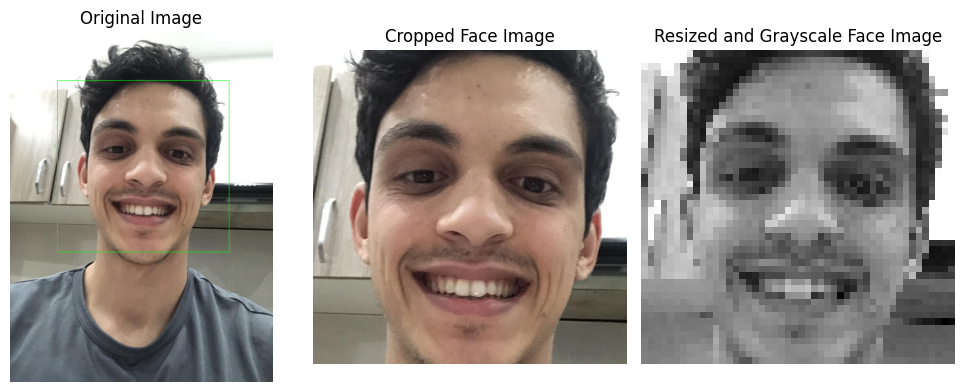

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the face detection cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
image_path = '/content/drive/MyDrive/PFA/2.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Save the first detected face image in the `face_img` variable
if len(faces) > 0:
    (x, y, w, h) = faces[0]
    face_img = image[y:y+h, x:x+w]

    image_with_rect = image.copy()
    cv2.rectangle(image_with_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Resize the face image
    resized_face_img = cv2.resize(face_img, (48, 48))

    # Convert the resized face image to grayscale
    gray_face_img = cv2.cvtColor(resized_face_img, cv2.COLOR_BGR2GRAY)

    # Plot the images
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    axes[0].imshow(cv2.cvtColor(image_with_rect, cv2.COLOR_BGR2RGB))
    axes[0].axis('off')
    axes[0].set_title('Original Image')

    axes[1].imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    axes[1].axis('off')
    axes[1].set_title('Cropped Face Image')

    axes[2].imshow(gray_face_img, cmap='gray')
    axes[2].axis('off')
    axes[2].set_title('Resized and Grayscale Face Image')

    plt.tight_layout()
    plt.show()
else:
    print("No faces detected in the image.")

import numpy as np

# Assuming you have your grayscale image as a NumPy array called "image"

# Reshape the image to add a new dimension for the channel
image = gray_face_img.reshape((48, 48, 1))

# **3 Classes Classification**

1/1 [==============================] - 0s 218ms/step
[[1.0000000e+00 8.1540192e-22 2.9485803e-26]]
Predicted class: 0


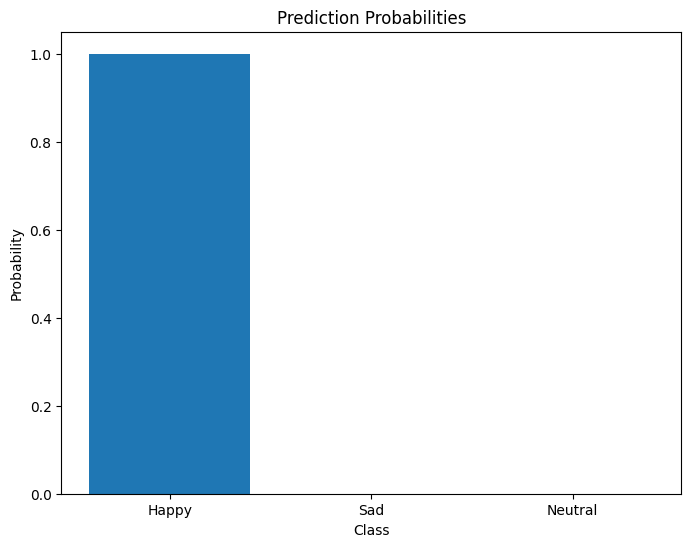

In [ ]:
from keras.models import load_model
import cv2
import numpy as np


model = load_model('/content/drive/MyDrive/PFA/model.h5')

preprocessed_image = cv2.resize(gray_face_img, (48, 48))
preprocessed_image = np.reshape(preprocessed_image, (1, 48, 48, 1))
#preprocessed_image = preprocessed_image / 255.0  # Normalize the image

# Make predictions
predictions = model.predict(preprocessed_image)
print(predictions)
# Process the predictions (e.g., get the predicted class label)
predicted_class = np.argmax(predictions[0])

predicted_class = np.argmax(predictions[0])
probability_values = predictions[0]

# Print the predicted class label
print("Predicted class:", predicted_class)

# Plotting the prediction probabilities as a bar plot
class_labels = ['Happy', 'Sad', 'Neutral']
plt.figure(figsize=(8, 6))
plt.bar(class_labels, probability_values)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()


# **6 Classes Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 67ms/step
Predicted class: 2


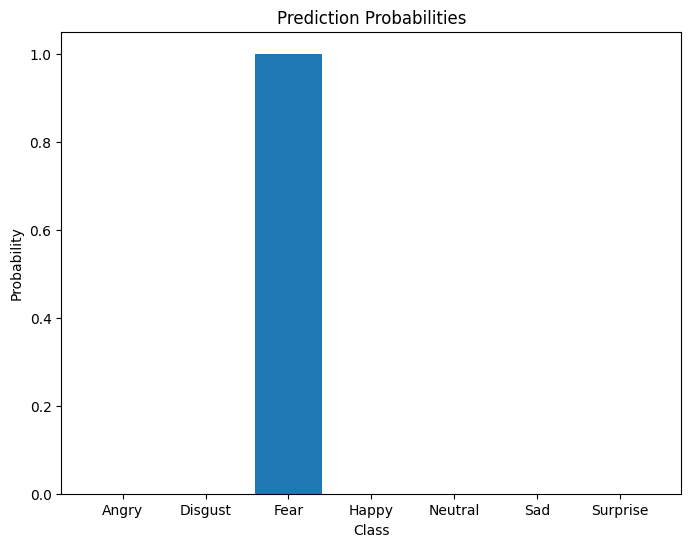

In [ ]:
from keras.models import load_model
import cv2
import numpy as np


model = load_model('/content/drive/MyDrive/PFA/model_v6_23.hdf5')

preprocessed_image = cv2.resize(gray_face_img, (48, 48))
preprocessed_image = np.reshape(preprocessed_image, (1, 48, 48, 1))
#preprocessed_image = preprocessed_image / 255.0  # Normalize the image

# Make predictions
predictions = model.predict(preprocessed_image)

# Process the predictions (e.g., get the predicted class label)
predicted_class = np.argmax(predictions[0])

predicted_class = np.argmax(predictions[0])
probability_values = predictions[0]

# Print the predicted class label
print("Predicted class:", predicted_class)

# Plotting the prediction probabilities as a bar plot
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral','Sad','Surprise' ]

plt.figure(figsize=(8, 6))
plt.bar(class_labels, probability_values)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()
